## 机智的医生生活 - 为什么这么受欢迎？


爬了豆瓣200条评论，对这部剧做一个简单的评论分析，究竟大家追剧的点都在哪里？


In [2]:
### get 220 comments from douban due to api call restriction 
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd 
import matplotlib.pyplot as plt
import time


s = requests.Session()
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36"}
cookies = {"DSID=AAO-7r5lWziVvfAI_tAwdimQb5eAb9QyzQ6I3wC2yMfNSW6nU_J8LZsQeheSyUP2BHjDJPyYhgMBREDp0nFTpnVQPhEeoyh2P45OK6z1xLWNsqoJvIsk6lo; IDE=AHWqTUl8zBISquDaKD5fleXQgXN-HC6p3NVFvIfmQM1JbxB5tIasccakPZFSZgs2"}
numbers = [i for i in range(0,480,20)]
overrall = []

for number in numbers:
    url ="https://movie.douban.com/subject/33464863/comments?start="+str(number)+"&limit=20&sort=new_score&status=P"
    res=s.get(url,headers = headers, cookies=cokies)
    print(number)
    soup = BeautifulSoup(res.text, 'html.parser')
    comment_items = soup.find_all(class_='comment-item')
    for comment_item in comment_items:
        review = {}
        review["comment"] = comment_item.find(class_='short').text
        review["user"] = comment_item.div.a['title']
        try:
            review["rating"] =comment_item.h3.find(class_=re.compile("ating"))['title']
        except:
            review['rating']='NA'
        overrall.append(review)
    time.sleep(10)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460


In [3]:
review_data = pd.DataFrame(overrall)
review_data.info()
### save to output
review_data['comment'].to_csv('comments.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  220 non-null    object
 1   user     220 non-null    object
 2   rating   220 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [4]:
len(review_data)

220

In [294]:
###豆瓣评分是这样的，5力荐，4推荐，3还行，2较差，1很差。
rating_dic ={"力荐":5,"推荐":4,"还行":3,"较差":2,"很差":1}
### need to replace accordingly with the number

# review_data['rating']= review_data['rating'].astype('str')
review_data['rating'].replace(rating_dic,inplace=True)
review_data['rating'].value_counts()

5     114
3      42
4      36
2      16
1       7
NA      5
Name: rating, dtype: int64

### Rating analysis
Most of people gives 5 star rating

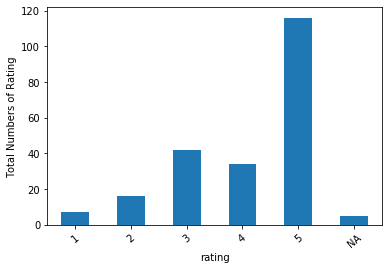

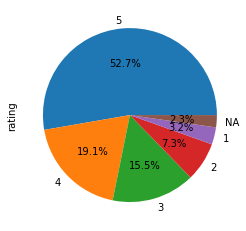

In [151]:
## rating 
### bar graph
rating_plot = review_data.groupby('rating')['rating'].count().plot.bar()
rating_plot.set_ylabel('Total Numbers of Rating')
rating_plot.set_xticklabels(rating_plot.get_xticklabels(),rotation=40)
plt.show()

## rating 
### pie chart 
rating_list = list(review_data['rating'].unique())
rating_pie = (review_data['rating'].value_counts()*100/len(review_data)).plot.pie(autopct="%.1f%%",labels=rating_list)

### Comment WordCloud

很多评论被提及的词语：
编剧
导演
友情
人物
医疗

In [178]:
combine_comment= review_data['comment'].to_list()
combine_comment = " ".join(combine_comment)

from wordcloud import WordCloud, STOPWORDS
import jieba  ## to tokenize the chinese characters

my_stopwords =open('cn_stopwords.txt','r')
wordlist_processed = jieba.cut(combine_comment)
wl_space_split=" ".join(wordlist_processed)
stopwords = set(STOPWORDS)

for each in my_stopwords.readlines():
    stopwords.add(each.replace('\n',''))

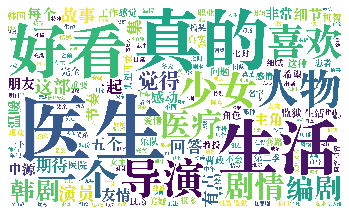

In [179]:
mywordcloud = WordCloud(stopwords=stopwords,background_color='white',width=5000,height=3000,margin=2,font_path = 'Songti.ttc').generate(wl_space_split)
plt.imshow(mywordcloud)
plt.axis("off")
plt.show()

In [173]:
mywordcloud.to_array

### Frequency of actors' and directors' name mentions
### 看看演员和导演被提及的数据情况

In [253]:
review_data['comment'] =review_data['comment'].astype('str')

pd = review_data['comment'].str.contains("申源浩|申pd|申导")
czs= review_data['comment'].str.contains("曹政奭|翼俊|曹叔|曹哥|曹演员|易俊")
sh= review_data['comment'].str.contains("颂华|颂和")
zjh=review_data['comment'].str.contains("郑敬淏|郑少女|郑京浩|俊完")
lys=review_data['comment'].str.contains("柳演锡|安政源")

In [256]:
actor_list = ['申源浩','曹政奭','田美都','郑京浩','柳演锡']
mention =[]
for actor_pd in [pd,czs,sh,zjh,lys]:
    mention.append(len(review_data[actor_pd]))

In [257]:
popularity = tuple(zip(actor_list,mention))

In [258]:
popularity_dict = { x:y for x,y in popularity}

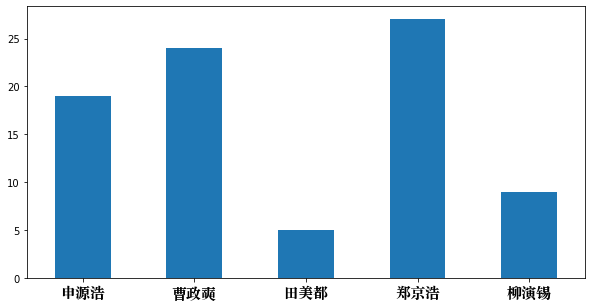

In [291]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
font = fm.FontProperties(fname='Songti.ttc')  # speicify font
plt.rcParams['figure.figsize']=[10,5]
# mpl.rcParams['axes.titlesize']=20
ax = pd.Series(popularity_dict,index=actor_list).plot(x = '演员/导演',y = '评论提及数',kind = 'bar')
ax.set_xticklabels(actor_list, fontproperties=font,rotation=0,fontsize=15)
plt.show()

In [292]:
# plt.savefig('foo.png')
ax.figure.savefig('poluation_.png')

### To identify the reasons among low-rated comments

In [317]:
# TODO:low rating comments and wordcloud
review_data['rating'].replace(to_replace='NA',value=0,inplace=True)
review_data['rating']=review_data['rating'].astype('int')
#review_data.loc[review_data['rating']<3]
low_rate_review =review_data.loc[review_data['rating']<3].comment.to_dict()

In [334]:
comment1 = review_data.loc[[34,41,44,57,65]].comment
# comment2= review_data.loc[[62,128,214]].comment

In [335]:
### 人物线过多 34, 41,44,57,65
### 期待太高,与前作相比有距离 62,128,214

34    跟机智的监狱生活差太多。导演是不是太过着急了点？人物线过多，而且太过于偏向于专业剧，看机智系...
41    大可不必因为申源浩就用那么厚重的滤镜看这部片子，看完前三集毫无亮点，医疗剧也不像，喜剧也没有...
44    三集弃。和前作全然没有可比性。当导演和团队选择了一个有无数珠玉在前的题材，却无法做到如前作那...
57    和机智监狱生活没得比，主角太多就凸显不出主次，没有主线剧情，看得出导演想沿用请回答系列的套路...
65    看了两集多，都没被吸引，感觉很混乱，人物没有立起来。和《live》差太多，同样是平稳开头，l...
Name: comment, dtype: object